<img src='./img/intel-logo.jpg' width=50%, Fig1> 

# OpenCV 기초강좌 

<font size=5><b>03. Image Transformation<b></font>

<div align='right'>성  민  석 (Minsuk  Sung)</div>
<div align='right'>류  회  성 (Hoesung Ryu)</div>

<img src='./img/OpenCV_Logo_with_text.png' width=20%, Fig2> 


---

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#이미지-크기-확인하기" data-toc-modified-id="이미지-크기-확인하기-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>이미지 크기 확인하기</a></span></li><li><span><a href="#이미지-확대/축소(scaling)" data-toc-modified-id="이미지-확대/축소(scaling)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>이미지 확대/축소(scaling)</a></span><ul class="toc-item"><li><span><a href="#이미지-축소" data-toc-modified-id="이미지-축소-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>이미지 축소</a></span></li><li><span><a href="#이미지-확대" data-toc-modified-id="이미지-확대-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>이미지 확대</a></span></li></ul></li><li><span><a href="#이동-(Translation)" data-toc-modified-id="이동-(Translation)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>이동 (Translation)</a></span></li><li><span><a href="#회전(Rotation)" data-toc-modified-id="회전(Rotation)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>회전(Rotation)</a></span></li></ul></div>

## 이미지 크기 확인하기 

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np

img = cv2.imread("./img/toy.jpg")

In [2]:
# 가로 x 세로 x 채널(RGB)
img.shape

(720, 1280, 3)

In [3]:
# 이미지 타입
print(img.dtype)

uint8


## 이미지 확대/축소(scaling)

```(python)
cv2.resize(img,              # 이미지
            dsize=(가로,세로), # 원하는사이즈
            interpolation= ) # 보간법 설정 
```

1. 이미지의 크기를 변경하는 경우, 픽셀은 추정해서 값을 할당해야합니다. 이때 보간법을 이용하여 픽셀을 추정합니다. 


2. 보간법의 종류

 보간법의 종류는 아래와 같다. 
 
|종류|의미|
|:---:|:---:|
|cv2.INTER_LINEAR|쌍 선형 보간법|
|cv2.INTER_NEAREST|이웃 보간법|
|cv2.INTER_LINEAR_EXACT|비트 쌍 선형 보간법|
|cv2.INTER_CUBIC|바이큐빅 보간법|
|cv2.INTER_AREA|영역 보간법|
|cv2.INTER_LANCZOS4|Lanczos 보간법|


 - 이미지를 확대하는경우: 바이큐빅 보간법, 쌍선형 보간법을 많이 사용한다. 
 
 
 - 이미지를 축소하는 경우: 영역 보간법을 많이 사용한다. 



### 이미지 축소

In [4]:
# 보간법 바이큐빅을 사용하여 640 x 480 으로 크기를 조절하자 
re_img = cv2.resize(img, 
                    dsize=(640, 480),
                    interpolation=cv2.INTER_CUBIC)

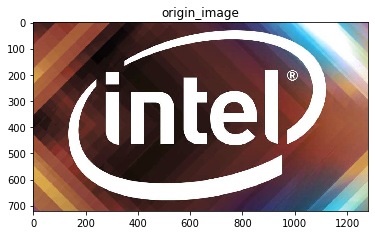

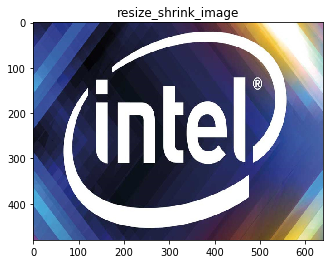

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

re_img = cv2.cvtColor(re_img, cv2.COLOR_BGR2RGB)

# b, g, r = cv2.split(re_img)
# re_img =cv2.merge([r,g,b])

plt.title("origin_image")
plt.imshow(img)
plt.show()


plt.title("resize_shrink_image")
plt.imshow(re_img)
plt.show()


### 이미지 확대 

In [6]:
# 보간법 바이큐빅을 사용하여 640 x 480 으로 크기를 조절하자 
re_img = cv2.resize(img, 
                    dsize=(2400, 1400),
                    interpolation=cv2.INTER_CUBIC)

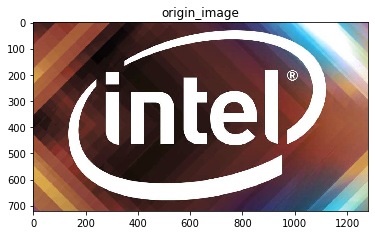

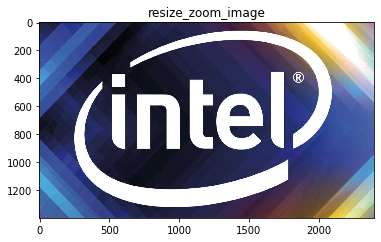

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt


b, g, r = cv2.split(re_img)
re_img =cv2.merge([r,g,b])

plt.title("origin_image")
plt.imshow(img)
plt.show()


plt.title("resize_zoom_image")
plt.imshow(re_img)
plt.show()



## 이동 (Translation)

`cv2.warpAffine`를 사용하여 이미지의 위치를 이동합니다. 

```
cv2.warpAffine(src, M, dsize)
    Parameters:	
    src – Image
    M – 변환 행렬
    dsize (tuple) – output image size(ex; (width=columns, height=rows)
   
```


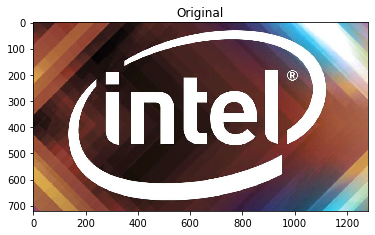

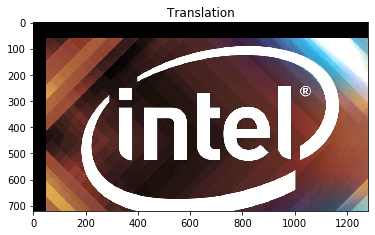

In [8]:
rows, cols = img.shape[:2]

# 변환 행렬, X축으로 50, Y축으로 60 이동
M = np.float32([[1,0,50],[0,1,60]])
dst = cv2.warpAffine(img, M,(cols, rows))

# plt.show 
plt.title("Original")
plt.imshow(img)
plt.show()


plt.title("Translation")
plt.imshow(dst)
plt.show()

## 회전(Rotation)


물체를 평면상의 한 점을 중심으로 $\theta$ 만큼 회전하는 변환 입니다. 양의 각도는 시계반대방향으로 회전을 합니다. 역시 변환행렬이 필요한며 변환행렬을 생성하는 함수는 `cv2.getRotationMatrix2D()` 함수입니다


```
cv2.getRotationMatrix2D(center, angle, scale) → M
        Parameters:	
        center – 이미지의 중심 좌표
        angle – 회전 각도
        scale – scale factor
```

위 결과에서 나온 변환행렬을 `cv2.warpAffine()` 함수에 적용합니다.

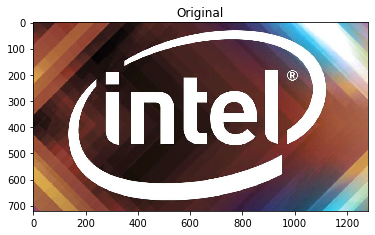

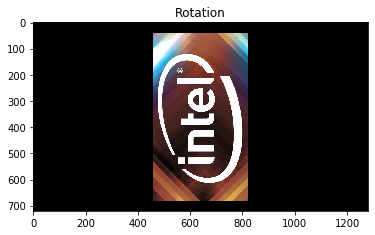

In [9]:
rows, cols = img.shape[:2]

# 이미지의 중심점을 기준으로 90도 회전 하면서 0.5배 Scale
M= cv2.getRotationMatrix2D((cols/2, rows/2),90, 0.5)

dst = cv2.warpAffine(img, M,(cols, rows))

cv2.imshow('Original', img)
cv2.imshow('Rotation', dst)

# plt.show 
plt.title("Original")
plt.imshow(img)
plt.show()


plt.title("Rotation")
plt.imshow(dst)
plt.show()